In [1]:
from src import *

In [2]:
# data_augment_from_folder(BANC_PATH, BPOS_PATH, data_augmentation_factor=1)
# max_harvest = 530
max_harvest = 100

#   Create comparable

### From a fresh kernel

In [3]:
siamese_model = make_siamese_model(make_embedding())

train_step = define_train_step(siamese_model)
train = define_training_loop(siamese_model, train_step)
print(f"Successfully created siamese model from pretrained kernel.")

data = harvest_from_folder(anc_path=BANC_PATH, pos_path=BPOS_PATH, neg_path=NEG_PATH, n_harvest = max_harvest)
train_data, test_data = build_dataloader_pipeline(data, max_data_size = max_harvest)

print(f"Begining transfert learning.")
train(train_data, n_epoch=1)
print(f"Transfert training complete, saving transfered siamese model.")
save_model(siamese_model, file_name='naive_siamese_model_George_C')

### From a pretrained kernel

In [4]:
embedding_pretrained = make_embedding_from_pretrained(file_name='embedding_kernel_A')
siamese_model = make_siamese_model(embedding_pretrained)

train_step = define_train_step(siamese_model)
train = define_training_loop(siamese_model, train_step)
print(f"Successfully created siamese model from pretrained kernel.")

data = harvest_from_folder(anc_path=BANC_PATH, pos_path=BPOS_PATH, neg_path=NEG_PATH, n_harvest = max_harvest)
train_data, test_data = build_dataloader_pipeline(data, max_data_size = max_harvest)

print(f"Begining transfert learning.")
train(train_data, n_epoch=1)
print(f"Transfert training complete, saving transfered siamese model.")
save_model(siamese_model, file_name='pretrained_siamese_model_George_C')

Successfully created siamese model from pretrained kernel.
Harvesting data from anchor data\benchmark_anchor, positive data\benchmark_positive and negative data\negative folder.
Anchor images availlable :	530
Positive images availlable :	530
Negative images availlable :	13233
Tuple harvested :		530
Labelling data
Successfully harvested and labelled 530 data.
Begining transfert learning.
Epoch 1/1
24/24 [==============================] - 395s 16s/step
Loss : 0.5653571486473083	Recall : 0.044692736119031906	Precision : 0.5714285969734192
Transfert training complete, saving transfered siamese model.
Successfully saved model at saved_model\pretrained_siamese_model_George.h5.


# Measure performance

In [5]:
file_name = 'naive_siamese_model_George_C'

model = make_siamese_model(make_embedding())
model.load_weights(os.path.join(SAVED_MODEL_PATH, f"{file_name}.h5"))
gross_scores_positive, gross_scores_negative = get_histogram_scores(model, max_harvest=100, force_computation=True, data_path=r'gross_scores_naive_C.npz')

100%|██████████| 500/500 [11:00<00:00,  1.32s/it]


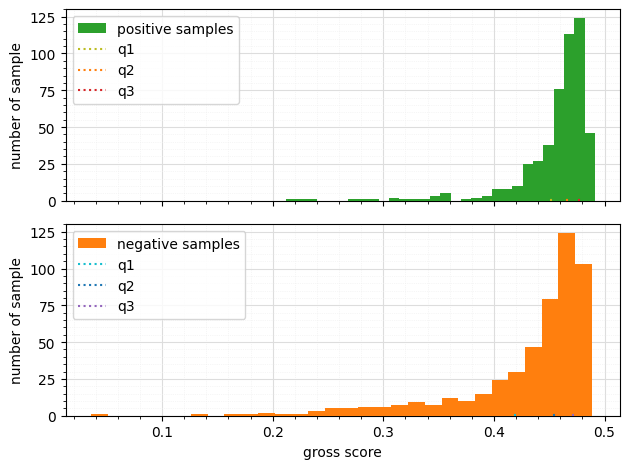

In [7]:
file_name = 'pretrained_siamese_model_George_C'

model = make_siamese_model(make_embedding())
model.load_weights(os.path.join(SAVED_MODEL_PATH, f"{file_name}.h5"))
gross_scores_positive, gross_scores_negative = get_histogram_scores(model, max_harvest=100, force_computation=True, data_path=r'gross_scores_pretrained_C.npz')